# Price Test

The purpose of this mini-project is to test if increasing the price from 39 to 59 is successful, using A/B testing.

## First, load the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
user = pd.read_csv('data/user_table.csv')
test = pd.read_csv('data/test_results.csv')

user_table shows the information of users' cities and locations. Test table includes more information. 

In [3]:
print(user.shape)
print(test.shape)

# Check duplication

print(len(user['user_id'].unique()))
print(len(test['user_id'].unique()))

(275616, 5)
(316800, 8)
275616
316800


In [4]:
user.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [5]:
test.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [6]:
user.isnull().sum()

user_id    0
city       0
country    0
lat        0
long       0
dtype: int64

In [7]:
test.isnull().sum()

user_id             0
timestamp           0
source              0
device              0
operative_system    0
test                0
price               0
converted           0
dtype: int64

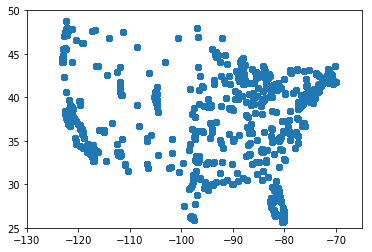

In [8]:
# Plot cities in the US map.

plt.scatter(user.loc[user['country']=='USA','long'],user.loc[user['country']=='USA','lat'])
plt.xlim([-130,-65])
plt.ylim([25,50])
plt.show()

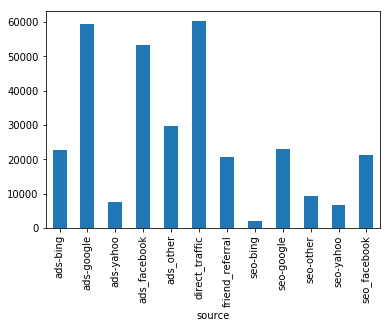

In [9]:
test.groupby('source')['user_id'].count().plot(kind='bar')
plt.show()

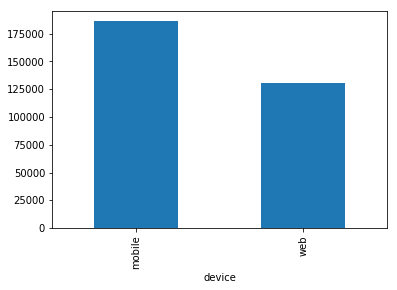

In [10]:
test.groupby('device')['user_id'].count().plot(kind='bar')
plt.show()

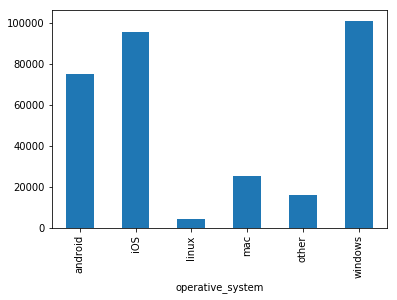

In [11]:
test.groupby('operative_system')['user_id'].count().plot(kind='bar')
plt.show()

Combine two tables, user_table left join the larger one. Then I have city and location information in data_combine. 

In [12]:
data_combine = test.merge(user,how='left', on='user_id')
#data_combine = data_combine.dropna()

In [13]:
data_combine.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


## A/B testing

In order to do A/B testing, I need to split the data into two groups: users for test, and users for controlling (base users). The best ratio between them is 0.5.

In [14]:
test_user =data_combine[data_combine['test']==1]
base_user =data_combine[data_combine['test']==0]


print(test_user.shape)
print(base_user.shape)
print(len(test_user)/len(base_user))

(114073, 12)
(202727, 12)
0.5626926852367963


For example, show the test_user, should have test = 1.

In [15]:
test_user.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
7,798371,2015-03-15 08:19:29,ads-bing,mobile,android,1,59,1,East Orange,USA,40.77,-74.21
8,447194,2015-03-28 12:28:10,ads_facebook,web,windows,1,59,0,Dayton,USA,39.78,-84.20
9,431639,2015-04-24 12:42:18,ads_facebook,web,windows,1,59,0,Richmond,USA,37.53,-77.47
15,552048,2015-03-22 08:58:32,ads-bing,web,windows,1,59,0,Culver City,USA,34.01,-118.40


Null hypothesis: The proportion of users in test set (test = 1) who are converted (by the product) is same as the user in the base group (test = 0).

Alternative hypothesis: The proportion of users in test set to converted is lower than that in the base set.

t-test

Check the mean of two groups. Looks different? 

In [16]:
print("test mean: ", test_user['converted'].mean())
print("base mean: ", base_user['converted'].mean())

test mean:  0.015542678810936857
base mean:  0.019903614220108817


Now do t-test, and the p-value is so small. So can I say that the alternative hypothesis is true? A short answer is yes, but we need to look into this problem more carefully. 

In [17]:
from scipy import stats

stats.ttest_ind(test_user['converted'], base_user['converted'])

Ttest_indResult(statistic=-8.78381266742153, pvalue=1.5878799805343215e-18)

## City-based test.

In [18]:
test_user1 =test_user[test_user['city']=='Chicago']
base_user1 =base_user[base_user['city']=='Chicago']

print("test mean: ", test_user1['converted'].mean())
print("base mean: ", base_user1['converted'].mean())


test_user2 =test_user[test_user['city']=='New York']
base_user2 =base_user[base_user['city']=='New York']

print("test mean: ", test_user2['converted'].mean())
print("base mean: ", base_user2['converted'].mean())

test mean:  0.013677217663149667
base mean:  0.014366565084893338
test mean:  0.014821272885789015
base mean:  0.018525223268163166


In [19]:
df_city = data_combine[['converted','city']].dropna()

In [20]:
df_city.head(20)

,converted,city
0,0,Buffalo
1,0,Lakeville
2,0,Parma
3,0,Fayetteville
4,0,Fishers
5,0,New York
7,1,East Orange
8,0,Dayton
9,0,Richmond
10,0,Bloomfield Township


In [21]:
converted_city = df_city.groupby('city').agg({'city':'count', 'converted':'mean'})\
 .rename(columns={'city':'count','converted':'mean'})
converted_city = converted_city.sort_values(by='count', ascending=False, kind='quicksort')

In [22]:
converted_city

,count,mean
city,,
New York,25748,0.017205
Chicago,7153,0.014120
Houston,6706,0.017894
San Antonio,4633,0.018347
Los Angeles,4141,0.019078
San Jose,3354,0.017293
Indianapolis,3217,0.013988
Jacksonville,2905,0.015491
Philadelphia,2541,0.018103


In [23]:
city_list = test_user['city'].unique()

In [24]:
pvalue_list = []
test_user_count = []
base_user_count = []

for city in city_list:
    test_user_city = test_user[test_user['city']==city]
    base_user_city = base_user[base_user['city']==city]
    stat,pvalue = stats.ttest_ind(test_user_city['converted'], 
                                  base_user_city['converted'])
    pvalue_list.append(pvalue)
    test_user_count.append(len(test_user_city))
    base_user_count.append(len(base_user_city))
    #print(city,pvalue,len(test_user_city),len(base_user_city))
    
df_city_pvalue = pd.DataFrame({'city': city_list,'base_count':base_user_count,'test_count':test_user_count, 'Pvalue':pvalue_list})

#print(len(pvalue_list),len(test_user_count),len(base_user_count),len(city_list))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [25]:
df_city_pvalue = df_city_pvalue.sort_values(by='base_count', ascending=False, inplace=False, kind='quicksort')\
.reset_index(drop=True)

In [26]:
df_city_pvalue.head(100)

,city,base_count,test_count,Pvalue
0,New York,16572,9176,0.028597
1,Chicago,4594,2559,0.812795
2,Houston,4265,2441,0.200980
3,San Antonio,2938,1695,0.246721
4,Los Angeles,2639,1502,0.181632
5,San Jose,2114,1240,0.483070
6,Indianapolis,2040,1177,0.648282
7,Jacksonville,1893,1012,0.597215
8,Philadelphia,1648,893,0.107462
9,Las Vegas,1514,912,0.848697


## check source-based test

In [27]:
print(len(df_city_pvalue))

len2 = len(df_city_pvalue[df_city_pvalue['Pvalue']>=0.05])

print(len2)

915
736


In [28]:
df_source = data_combine[['converted','source']].dropna()
df_source.head()

,converted,source
0,0,ads_facebook
1,0,seo-google
2,0,ads-bing
3,0,direct_traffic
4,0,ads_facebook


In [29]:
source_list = test_user['source'].unique()
print(source_list)

['direct_traffic' 'ads-bing' 'ads_facebook' 'ads-yahoo' 'ads-google'
 'ads_other' 'seo-google' 'seo_facebook' 'friend_referral' 'seo-other'
 'seo-yahoo' 'seo-bing']


In [30]:
pvalue_list = []
test_user_count = []
base_user_count = []

for source in source_list:
    test_user_source = test_user[test_user['source']==source]
    base_user_source = base_user[base_user['source']==source]
    stat,pvalue = stats.ttest_ind(test_user_source['converted'], 
                                  base_user_source['converted'])
    pvalue_list.append(pvalue)
    test_user_count.append(len(test_user_source))
    base_user_count.append(len(base_user_source))
    #print(city,pvalue,len(test_user_source),len(base_user_source))
    
df_source_pvalue = pd.DataFrame({'source': source_list,'base_count':base_user_count,'test_count':test_user_count, 'Pvalue':pvalue_list})

In [32]:
df_source_pvalue = df_source_pvalue.sort_values(by='base_count', ascending=False, inplace=False, kind='quicksort')\
.reset_index(drop=True)

In [33]:
df_source_pvalue

,source,base_count,test_count,Pvalue
0,direct_traffic,38759,21598,2.271750e-04
1,ads-google,37864,21515,1.755217e-02
2,ads_facebook,34099,19297,1.443448e-07
3,ads_other,19284,10592,4.107688e-02
4,seo-google,15102,8073,3.789729e-01
5,ads-bing,14609,8264,1.140831e-02
6,seo_facebook,13471,7734,3.086681e-02
7,friend_referral,13135,7560,3.030672e-03
8,seo-other,5889,3371,6.062586e-02
9,ads-yahoo,4818,2765,5.167598e-02


## OS-based test

In [34]:
df_os = data_combine[['converted','operative_system']].dropna()
df_os.head()

,converted,operative_system
0,0,iOS
1,0,android
2,0,android
3,0,iOS
4,0,mac


In [35]:
os_list = test_user['operative_system'].unique()
pvalue_list = []
test_user_count = []
base_user_count = []

for os in os_list:
    test_user_os = test_user[test_user['operative_system']==os]
    base_user_os = base_user[base_user['operative_system']==os]
    stat,pvalue = stats.ttest_ind(test_user_os['converted'], 
                                  base_user_os['converted'])
    pvalue_list.append(pvalue)
    test_user_count.append(len(test_user_os))
    base_user_count.append(len(base_user_os))
    print(os,pvalue,len(test_user_os),len(base_user_os))
    
df_os_pvalue = pd.DataFrame({'operative_system': os_list,'base_count':base_user_count,'test_count':test_user_count, 'Pvalue':pvalue_list})

iOS 0.0003312143866427084 33610 61855
android 1.3984770839551302e-05 26725 48210
windows 2.1936735847601526e-08 37385 63591
other 0.1113703948149692 5706 10498
mac 0.035714244139046496 8719 16366
linux 4.23462673671272e-08 1928 2207


In [36]:
df_os_pvalue = df_os_pvalue.sort_values(by='base_count', ascending=False, inplace=False, kind='quicksort')\
.reset_index(drop=True)

In [37]:
df_os_pvalue

,operative_system,base_count,test_count,Pvalue
0,windows,63591,37385,2.193674e-08
1,iOS,61855,33610,3.312144e-04
2,android,48210,26725,1.398477e-05
3,mac,16366,8719,3.571424e-02
4,other,10498,5706,1.113704e-01
5,linux,2207,1928,4.234627e-08


## Short Summary:

Difference is obvious between test/control groups in general, but for individual cities the conversion rates are basically with no differences. I can do revenue instead of conversion rate if I have more time. 